In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
import os
print(os.listdir("input"))
features=pd.read_csv('input/DATAA.csv')
features.head(5)

['DATAA.csv', 'DATAB.csv']


,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T,LNG_MF,H2_P,CO2_P,POWER,PCC_P,EXERGY,HHV
0,47.9,6.3,0.32,0.01,44.27,1.2,300,500,640,750,700,1000,310,700,82.575165,382.298959,229.700598,1350.8379,331.935067,9115.993
1,47.9,6.3,0.32,0.01,44.27,1.2,300,500,640,750,700,1000,310,800,82.575165,437.164581,250.991074,1350.8379,331.935067,9115.993
2,47.9,6.3,0.32,0.01,44.27,1.2,300,500,640,750,700,1000,310,900,82.575165,492.030203,272.277819,1350.8379,331.935067,9115.993
3,47.9,6.3,0.32,0.01,44.27,1.2,300,500,640,750,700,1000,310,1000,82.575165,546.895824,293.561646,1350.8379,331.935067,9115.993
4,47.9,6.3,0.32,0.01,44.27,1.2,300,500,640,750,700,1000,310,1100,82.575165,601.761446,314.843148,1350.8379,331.935067,9115.993


In [2]:
features=features.sample(n=1000000, replace=True,random_state=40)
features.head()

,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T,LNG_MF,H2_P,CO2_P,POWER,PCC_P,EXERGY,HHV
6171974,45.8500,6.13000,0.35000,0.00000,44.8000,2.87,405,500,460,875,800,2240,694,1400,124.767908,638.055874,461.699778,3025.87689,380.602181,8599.60152
2914311,48.7872,8.13120,1.35520,0.00000,38.5264,3.20,300,800,370,824,1050,3150,502,800,173.307919,228.222438,396.479651,4255.13937,438.625698,9515.01968
12007589,53.9460,6.53575,1.34737,0.10055,36.2604,1.81,370,780,400,800,820,1720,310,1300,77.040764,711.492689,415.779966,2323.44118,396.144528,8606.03929
8183224,43.7100,5.85000,0.01000,0.00000,45.1600,5.27,370,730,450,900,980,2600,566,800,129.368686,403.130903,375.824684,3512.17853,472.659452,7872.52800
9229618,53.9109,6.10698,0.36038,0.00000,37.1217,2.50,440,900,430,850,1200,3300,374,800,164.437667,279.833278,415.624148,4457.76506,499.622822,8598.03007


In [3]:
#from sklearn.model_selection import train_test_split
#train, test = train_test_split(features,test_size=0.20,random_state=40)
#train, valid=train_test_split(train, test_size=0.125, random_state=40)


#col_targets=['H2_P','CO2_P','POWER','PCC_P','EXERGY','HHV']
col_targets=['H2_P']
col_randoms = ["Carbon", "Hydrogen","Nitrogen","Sulfur","Oxygen","Ash","Air_MF","Steam_MF","PYROL_T", "GASIF_T","Water_WGS","CAOH2","CARBONAT_T"]

features_ = features[col_randoms ]
labels = features[col_targets]
#features= features.drop(col_targets, axis = 1)# Remove the Crop Yield from the features
#feature_list = list(features.columns)# Saving feature names for later use
#features = np.array(features)# Convert features to numpy array
type(features)

pandas.core.frame.DataFrame

In [4]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features_, labels, test_size = 0.30, random_state = 42)

In [5]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [6]:
rfr=RandomForestRegressor(random_state=40)

In [7]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [int(x) for x in np.linspace(10,100,3,endpoint=True,dtype = int)],
    'min_samples_leaf': [int(x) for x in np.linspace(2,10,3,endpoint=True,dtype = int)],
    'min_samples_split':[int(x) for x in np.linspace(2,15,3,endpoint=True,dtype = int)],
    'n_estimators': [int(x) for x in np.linspace(50,1200,3,endpoint=True,dtype = int)]
}

In [8]:
CV_rfc = GridSearchCV(estimator=rfr, param_grid=param_grid, cv= 6,scoring='neg_mean_absolute_error',n_jobs = -1, verbose = 2)
CV_rfc.fit(train_features,train_labels)

Fitting 6 folds for each of 81 candidates, totalling 486 fits


GridSearchCV(cv=6, estimator=RandomForestRegressor(random_state=40), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [10, 55, 100],
                         'min_samples_leaf': [2, 6, 10],
                         'min_samples_split': [2, 8, 15],
                         'n_estimators': [50, 625, 1200]},
             scoring='neg_mean_absolute_error', verbose=2)

In [9]:
BaseLineRFR=RandomForestRegressor(bootstrap=True,
                                             max_depth=80,
                                             min_samples_leaf=3,
                                             min_samples_split=8,
                                             n_estimators=200)
import joblib

joblib.dump(BaseLineRFR, "./BaseLineModelrandom_forest_Regression.joblib",compress=3)

['./BaseLineModelrandom_forest_Regression.joblib']

In [10]:
BaseLineModel = joblib.load("./BaseLineModelrandom_forest_Regression.joblib")
BaseLineModel.fit(train_features,train_labels)
Bpredicted_labels_train_features=BaseLineModel.predict(train_features)
Bpredicted_labels_test_features=BaseLineModel.predict(test_features)

In [11]:
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

#print("Correlation Coefficient (r) of Baseline Random Forest Regression Model on Training Data: ",pearsonr(train_labels,Bpredicted_labels_train_features))
#print("Correlation Coefficient (r) of Baseline Random Forest Regression Model on Testing Data: ",pearsonr(test_labels,Bpredicted_labels_test_features))

print("MAE of Baseline Random Forest Regression Model on Training Data: ",mean_absolute_error(train_labels,Bpredicted_labels_train_features))
print("MAE of Baseline Random Forest Regression Model on Testing Data: ",mean_absolute_error(test_labels,Bpredicted_labels_test_features))

print("R2 of Baseline Random Forest Regression Model on Training Data: ",r2_score(train_labels,Bpredicted_labels_train_features))
print("R2 of Baseline Random Forest Regression Model on Testing Data: ",r2_score(test_labels,Bpredicted_labels_test_features))

print("RMSE of Baseline Random Forest Regression Model on Training Data: ",np.sqrt(mean_squared_error(train_labels,Bpredicted_labels_train_features)))
print("RMSE of Baseline Random Forest Regression Model on Testing Data: ",np.sqrt(mean_squared_error(test_labels,Bpredicted_labels_test_features)))

MAE of Baseline Random Forest Regression Model on Training Data:  0.2423173925996652
MAE of Baseline Random Forest Regression Model on Testing Data:  0.3514419390571615
R2 of Baseline Random Forest Regression Model on Training Data:  0.9998807426964585
R2 of Baseline Random Forest Regression Model on Testing Data:  0.9997520819756441
RMSE of Baseline Random Forest Regression Model on Training Data:  0.4514536200925668
RMSE of Baseline Random Forest Regression Model on Testing Data:  0.6505788863385922


In [12]:
from sklearn import linear_model
from genetic_selection import GeneticSelectionCV

                                        
Featureselector = GeneticSelectionCV(BaseLineModel,
                                  cv=5,
                                  verbose=1,
                                  scoring="neg_mean_absolute_error", 
                                  max_features=5,
                                  n_population=20,
                                  crossover_proba=0.05,
                                  mutation_proba=0.001,
                                  n_generations=50,
                                  crossover_independent_proba=0.5,
                                  mutation_independent_proba=0.05,
                                  tournament_size=3,
                                  n_gen_no_change=10,
                                  caching=True,
                                  n_jobs=-1)
FeatureselectorModel = Featureselector.fit(train_features,train_labels)

Selecting features with genetic algorithm.
gen	nevals	avg                               	std                            	min                               	max                               
0  	20    	[-18.729084   2.95       0.037428]	[ 5.006317  1.395529  0.026112]	[-28.728771   1.         0.007393]	[-10.291779   5.         0.113113]
1  	2     	[-14.48061    4.         0.026668]	[ 3.757883  0.894427  0.003144]	[-22.87537    2.         0.019135]	[-10.291779   5.         0.029904]
2  	2     	[-11.955084   4.8        0.028271]	[ 2.438601  0.4       0.001408]	[-16.795101   4.         0.024225]	[-10.213507   5.         0.029904]
3  	0     	[-10.745278   4.95       0.028848]	[ 1.416289  0.217945  0.001211]	[-16.745965   4.         0.025802]	[-10.213507   5.         0.029549]
4  	0     	[-10.26047   5.        0.02805]   	[ 0.038345  0.        0.001836]	[-10.291779   5.         0.025802]	[-10.213507   5.         0.029549]
5  	2     	[-10.2291     5.         0.026586]	[ 0.03129   0.        0

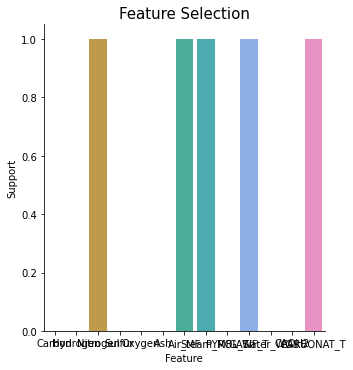

,Feature,Support,Score
0,Carbon,False,-10.291779
1,Hydrogen,False,-10.291779
2,Nitrogen,True,-10.213507
3,Sulfur,False,-10.213507
4,Oxygen,False,-10.213507
5,Ash,False,-10.212676
6,Air_MF,True,-10.212676
7,Steam_MF,True,-10.212676
8,PYROL_T,False,-10.212676
9,GASIF_T,True,-10.212676


In [13]:
featurename= list(features_.columns.values)

df = pd.DataFrame((featurename,Featureselector.support_,Featureselector.generation_scores_))

Transpose=df.T
Transpose.columns =['Feature','Support','Score']
Transpose.head()
import seaborn as sns
import matplotlib.pyplot as plt
sns.factorplot(x= 'Feature', y= 'Support', data= Transpose, kind = 'bar', legend='True')
plt.title('Feature Selection',fontsize=15)
plt.show()
Transpose

In [14]:
predicted_labels_train_features=FeatureselectorModel .predict(train_features)
predicted_labels_test_features=FeatureselectorModel .predict(test_features)

print("Correlation Coefficient (r) of Optimised Random Forest Regression Model on Training Data: ",r2_score(train_labels,predicted_labels_train_features))
print("Correlation Coefficient (r) of Optimised Random Forest Regression Model on Testing Data: ",r2_score(test_labels,predicted_labels_test_features))

print("MAE of Optimised Random Forest Regression Model on Training Data: ",mean_absolute_error(train_labels,predicted_labels_train_features))#t/ha
print("MAE of Optimised Random Forest Regression Model on Testing Data: ",mean_absolute_error(test_labels,predicted_labels_test_features))#t/ha

print("RMSE of Optimised Random Forest Regression Model on Training Data: ",np.sqrt(mean_squared_error(train_labels,predicted_labels_train_features)))#t/ha
print("RMSE of Optimised Random Forest Regression Model on Testning Data: ",np.sqrt(mean_squared_error(test_labels,predicted_labels_test_features)))#t/ha

Correlation Coefficient (r) of Optimised Random Forest Regression Model on Training Data:  0.8768432940664702
Correlation Coefficient (r) of Optimised Random Forest Regression Model on Testing Data:  0.8681427198388124
MAE of Optimised Random Forest Regression Model on Training Data:  9.80747664841812
MAE of Optimised Random Forest Regression Model on Testing Data:  10.167909152496629
RMSE of Optimised Random Forest Regression Model on Training Data:  14.507737176767716
RMSE of Optimised Random Forest Regression Model on Testning Data:  15.0036861240322


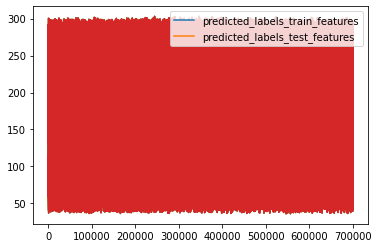

In [15]:
plt.plot(predicted_labels_train_features)
plt.plot(predicted_labels_test_features)
plt.plot(Bpredicted_labels_train_features)
plt.plot(Bpredicted_labels_train_features)

plt.legend(['predicted_labels_train_features','predicted_labels_test_features'])

In [16]:
fig = plt.figure(figsize=(15,5))

<Figure size 1080x360 with 0 Axes>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


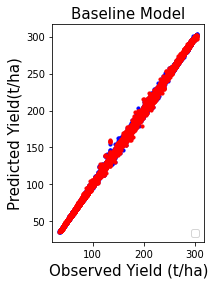

In [17]:
ax1 = plt.subplot(1, 2, 1)
ax1.scatter(train_labels,Bpredicted_labels_train_features,s=10, c='b', marker="o")
ax1.scatter(test_labels,Bpredicted_labels_test_features,s=10, c='r', marker="o")
plt.xlabel('Observed Yield (t/ha)',fontsize=15)
plt.ylabel('Predicted Yield(t/ha)',fontsize=15)
plt.title('Baseline Model',fontsize=15)
plt.legend(loc="lower right")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


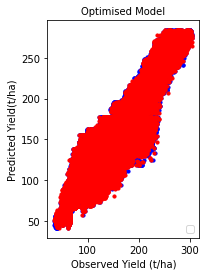

In [18]:
ax1 = plt.subplot(1, 2, 2)
ax1.scatter(train_labels,predicted_labels_train_features,s=10, c='b', marker="o")
ax1.scatter(test_labels,predicted_labels_test_features,s=10, c='r', marker="o")
plt.xlabel('Observed Yield (t/ha)',fontsize=10)
plt.ylabel('Predicted Yield(t/ha)',fontsize=10)
plt.title('Optimised Model',fontsize=10)
plt.legend(loc="lower right")
plt.show()

Text(0, 0.5, 'Predicted')

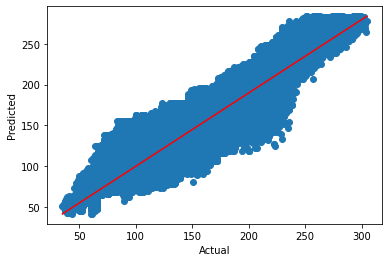

In [19]:
plt.scatter(test_labels,predicted_labels_test_features)
plt.plot([test_labels.min(),test_labels.max()],[predicted_labels_test_features.min(),predicted_labels_test_features.max()], color='red')
#plt.scatter(valid_y,valid_y, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')